### **Homework Assignment 1: End-to-End Machine Learning**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


In [19]:
file_path = 'bank-full.csv'
df = pd.read_csv(file_path, sep=';')

In [20]:
df.head(15)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### 1. Exploratory Data Analysis

There are outliers in the `Age` column of `sample-data-with-outliers.csv`. 1) Create a boxplot for `Age` 2) Use a statistical method for identifying outliers in `Age` 3) Create a version of the data where outliers are **removed** from `Age` and make a boxplot for `Age` 3) Create a version of the data where outliers from `Age` are **imputed** and make a boxplot for `Age`.

In [21]:
df.describe()
#len(df)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [22]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


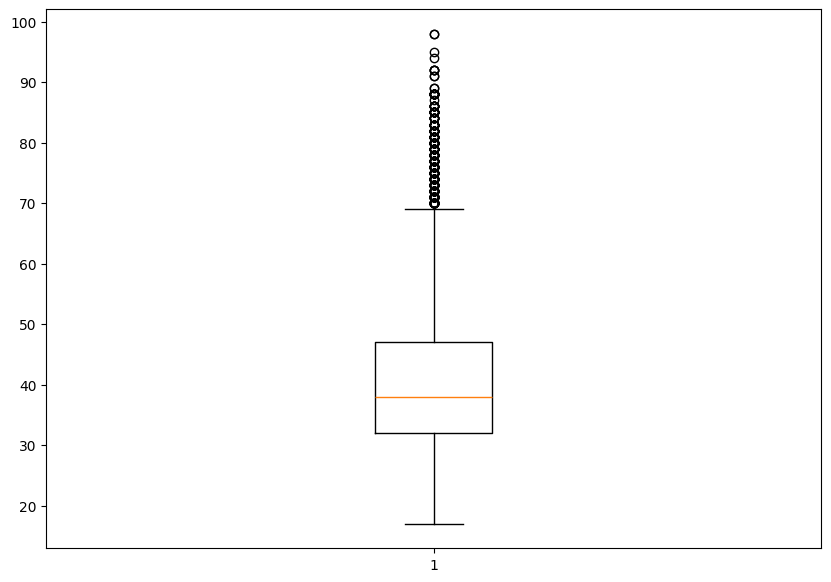

In [23]:
d = df['age']
fig = plt.figure(figsize =(10, 7))

plt.boxplot(d)
plt.show()

In [24]:
df['Z_Score'] = zscore(df['age'])
outliers_z_score = df[np.abs(df['Z_Score']) > 3.5]
outliers_z_score.sort_values(by= 'Z_Score', ascending= True).head()
#len(outliers_z_score)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Z_Score
27851,77,retired,divorced,unknown,no,yes,no,cellular,mar,tue,...,999,0,nonexistent,-1.8,92.843,-50.0,1.614,5099.1,yes,3.548172
30171,77,retired,divorced,basic.4y,no,no,no,cellular,apr,thu,...,999,1,failure,-1.8,93.075,-47.1,1.365,5099.1,no,3.548172
36285,77,management,single,basic.9y,no,no,no,cellular,jun,mon,...,999,1,failure,-2.9,92.963,-40.8,1.266,5076.2,no,3.548172
38944,77,retired,divorced,basic.4y,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-3.4,92.649,-30.1,0.718,5017.5,no,3.548172
38825,77,retired,married,unknown,no,yes,no,cellular,nov,fri,...,3,1,success,-3.4,92.649,-30.1,0.714,5017.5,yes,3.548172


In [25]:
df_no_outliers_z = df[np.abs(df['Z_Score']) <= 3.5]
df_imputed = df.copy()
df_imputed['age'].where(~df.index.isin(outliers_z_score.index), df['age'].median(), inplace=True)

C:\Users\Black Knight\AppData\Local\Temp\ipykernel_29152\1598093081.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed['age'].where(~df.index.isin(outliers_z_score.index), df['age'].median(), inplace=True)


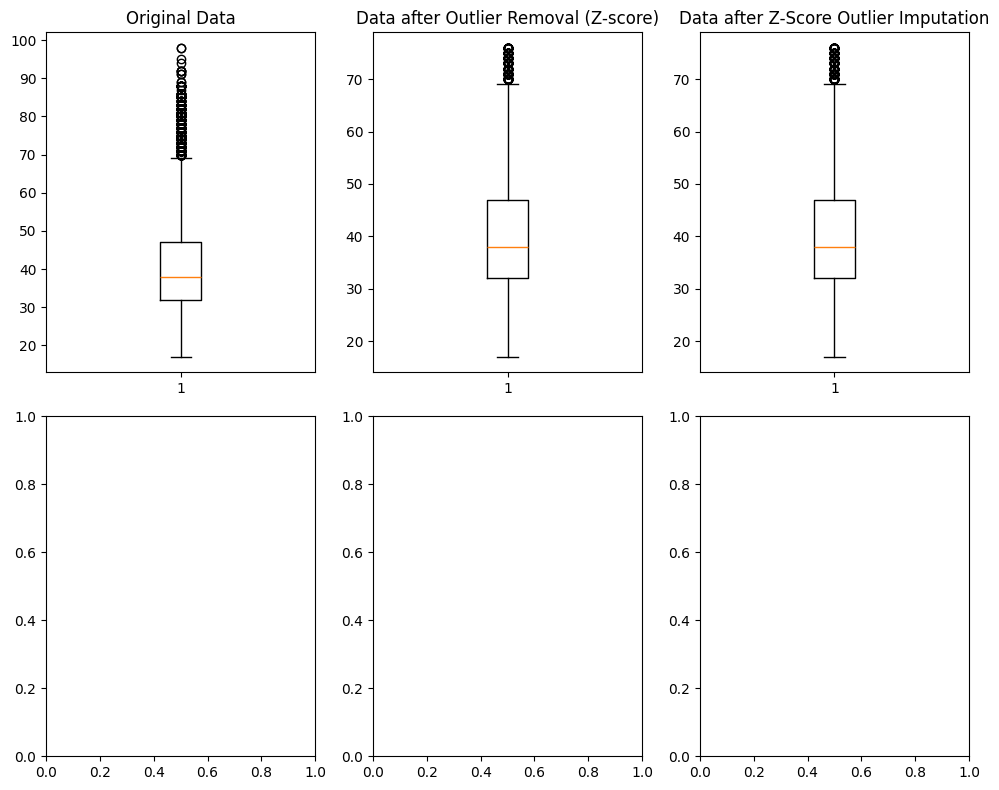

In [26]:
fig, axs = plt.subplots(2, 3, figsize=(10, 8))
axs[0, 0].boxplot(df['age'])
axs[0, 0].set_title('Original Data')

axs[0, 1].boxplot(df_no_outliers_z['age'])
axs[0, 1].set_title('Data after Outlier Removal (Z-score)')

axs[0, 2].boxplot(df_imputed['age'])
axs[0, 2].set_title('Data after Z-Score Outlier Imputation')

plt.tight_layout()
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'housemaid'),
  Text(1, 0, 'services'),
  Text(2, 0, 'admin.'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'technician'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'management'),
  Text(7, 0, 'unemployed'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unknown'),
  Text(10, 0, 'entrepreneur'),
  Text(11, 0, 'student')])

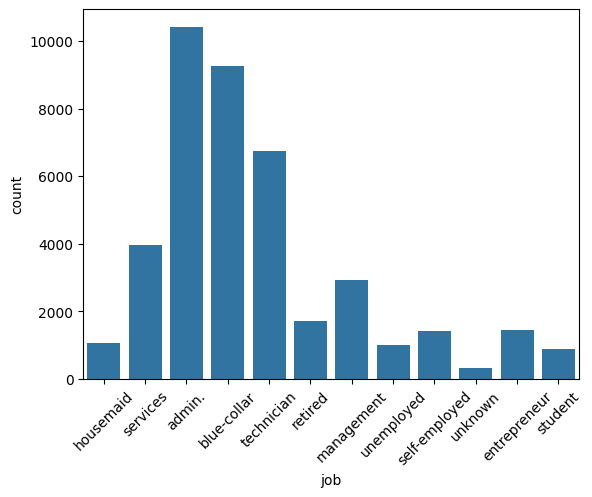

In [27]:
sns.countplot(data=df, x='job')
plt.xticks(rotation=45)

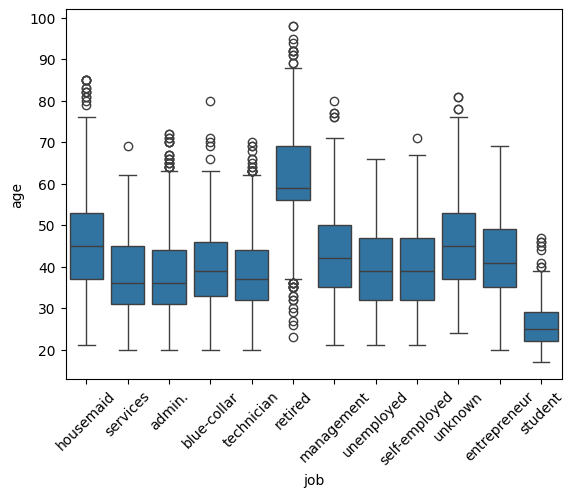

In [28]:
sns.boxplot(data=df, x='job', y='age')
plt.xticks(rotation=45)
plt.show()

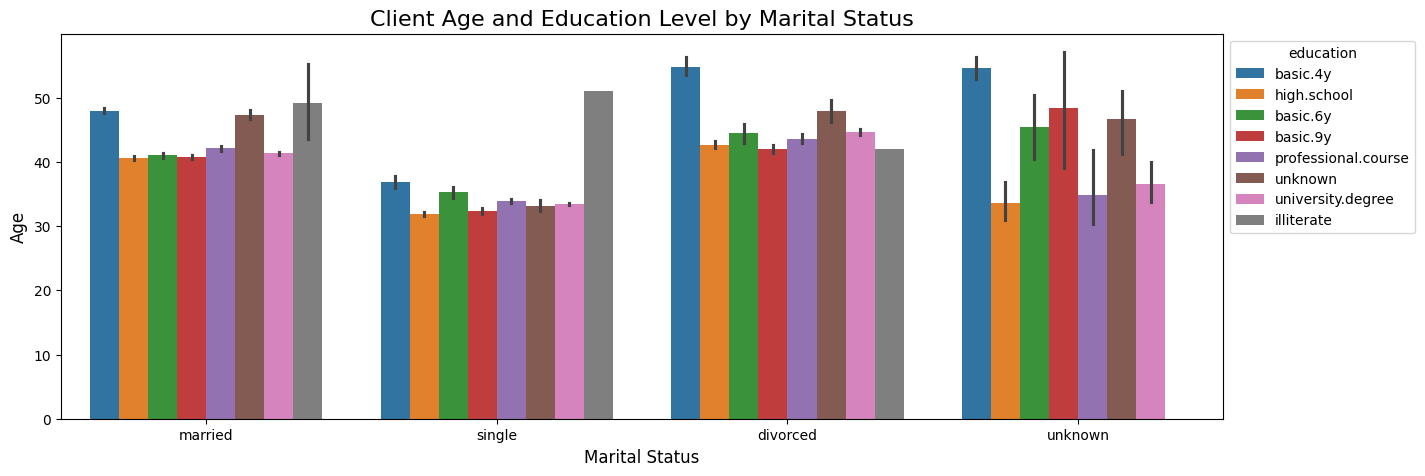

In [29]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='marital', y='age', hue='education', data=df, ax=ax)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Client Age and Education Level by Marital Status", fontsize=16)
plt.xlabel("Marital Status", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.show()

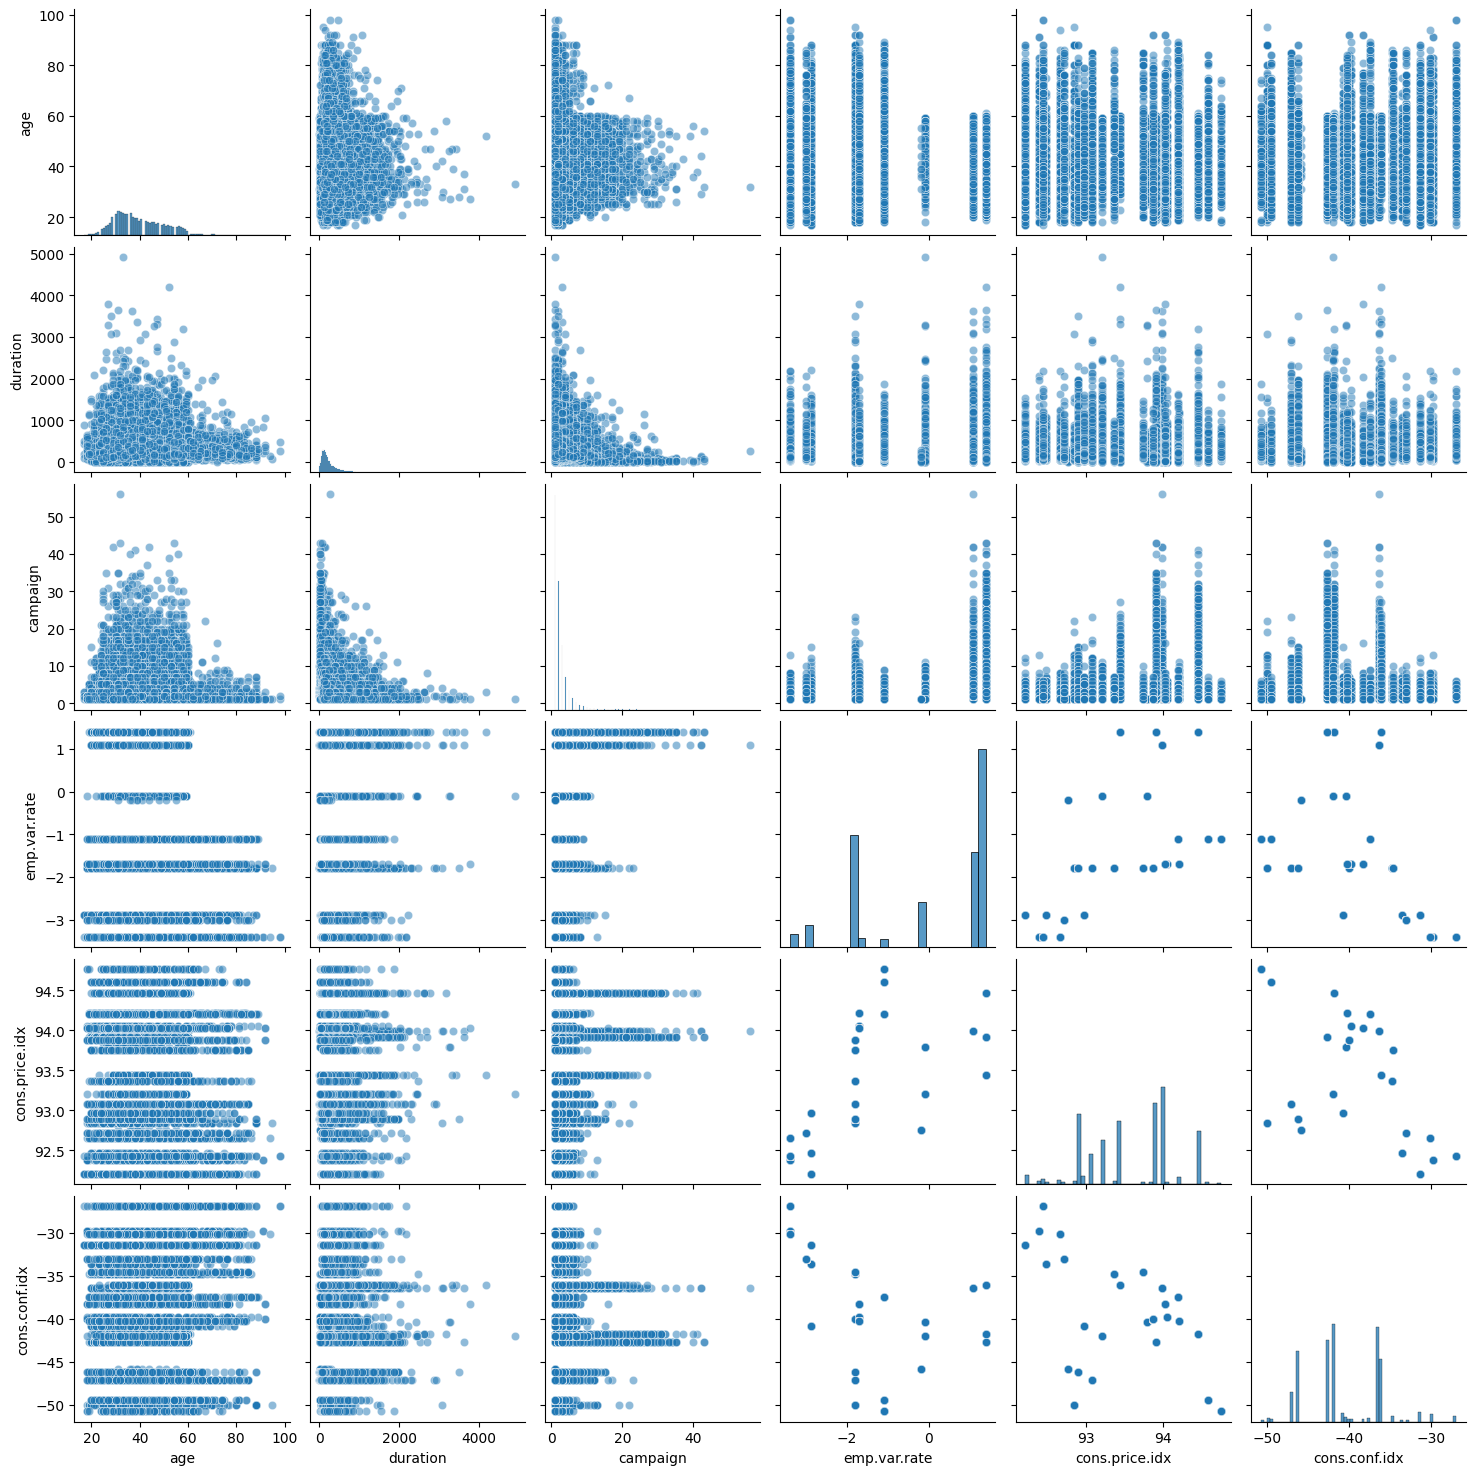

In [30]:
sns.pairplot(df, vars= ["age", "duration", "campaign", "emp.var.rate", "cons.price.idx", "cons.conf.idx"], plot_kws={'alpha': 0.5})

### 2. Data Preparation

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [32]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Z_Score
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.533034
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.628993
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,-0.290186
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,-0.002309
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.533034


In [33]:
print(f"\nMissing Values:\n{df.isnull().sum()}")



Missing Values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
Z_Score           0
dtype: int64


In [34]:
df.to_csv('client_output.csv', index=False)  

In [35]:
df.replace('unknown', np.nan, inplace=True)
print(f"\nMissing Values:\n{df.isnull().sum()}")


Missing Values:
age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
Z_Score              0
dtype: int64


In [36]:
df['job'] = df['job'].str.replace('.', '')
df['job'] = df['job'].str.replace('-', '_')


In [37]:
df_clean = df.copy()
df_clean['default_clean'] = df['default'].fillna('yes', inplace=False)
df_clean = df_clean.dropna(subset=["job", "marital", "education", "housing", "loan"], inplace=False)    
df_nna = df_clean.drop("default", axis=1, inplace=False)  

df_nna.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Z_Score,default_clean
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.533034,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.628993,yes
2,37,services,married,high.school,yes,no,telephone,may,mon,226,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,-0.290186,no
3,40,admin,married,basic.6y,no,no,telephone,may,mon,151,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,-0.002309,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.533034,no


In [39]:
print(f"\nMissing Values:\n{df_nna.isnull().sum()}")


Missing Values:
age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
Z_Score           0
default_clean     0
dtype: int64


In [40]:
df_nna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38245 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38245 non-null  int64  
 1   job             38245 non-null  object 
 2   marital         38245 non-null  object 
 3   education       38245 non-null  object 
 4   housing         38245 non-null  object 
 5   loan            38245 non-null  object 
 6   contact         38245 non-null  object 
 7   month           38245 non-null  object 
 8   day_of_week     38245 non-null  object 
 9   duration        38245 non-null  int64  
 10  campaign        38245 non-null  int64  
 11  pdays           38245 non-null  int64  
 12  previous        38245 non-null  int64  
 13  poutcome        38245 non-null  object 
 14  emp.var.rate    38245 non-null  float64
 15  cons.price.idx  38245 non-null  float64
 16  cons.conf.idx   38245 non-null  float64
 17  euribor3m       38245 non-null  floa

In [41]:
df_nna1 = df_nna.copy()
df_nna1 = df_nna1.drop(["month", "day_of_week"], axis=1, inplace=False)  
df_nna1.head()

,age,job,marital,education,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Z_Score,default_clean
0,56,housemaid,married,basic.4y,no,no,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.533034,no
1,57,services,married,high.school,no,no,telephone,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.628993,yes
2,37,services,married,high.school,yes,no,telephone,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,-0.290186,no
3,40,admin,married,basic.6y,no,no,telephone,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,-0.002309,no
4,56,services,married,high.school,no,yes,telephone,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.533034,no


In [42]:
columns_to_encode = ['marital', 'education', 'housing', 'loan', 'contact', 'poutcome', 'y', 'default_clean']

In [43]:

df1 = df_nna1.copy()
label_encoder = LabelEncoder()
df1[columns_to_encode] = df1[columns_to_encode].apply(LabelEncoder().fit_transform)


In [44]:
df1['job'] = df1['job'].astype('category')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38245 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             38245 non-null  int64   
 1   job             38245 non-null  category
 2   marital         38245 non-null  int64   
 3   education       38245 non-null  int64   
 4   housing         38245 non-null  int64   
 5   loan            38245 non-null  int64   
 6   contact         38245 non-null  int64   
 7   duration        38245 non-null  int64   
 8   campaign        38245 non-null  int64   
 9   pdays           38245 non-null  int64   
 10  previous        38245 non-null  int64   
 11  poutcome        38245 non-null  int64   
 12  emp.var.rate    38245 non-null  float64 
 13  cons.price.idx  38245 non-null  float64 
 14  cons.conf.idx   38245 non-null  float64 
 15  euribor3m       38245 non-null  float64 
 16  nr.employed     38245 non-null  float64 
 17  y               3

In [45]:
df2 = df1.copy()

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data = encoder.fit_transform(df2[['job']])
df_one_hot = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['job']))
df_combined = pd.concat([df2, df_one_hot], axis=1)

In [47]:
df_combined = df_combined.drop(["job"], axis=1, inplace=False) 
df_combined.to_csv('client_output.csv', index=False)  
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40889 entries, 0 to 38229
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                38245 non-null  float64
 1   marital            38245 non-null  float64
 2   education          38245 non-null  float64
 3   housing            38245 non-null  float64
 4   loan               38245 non-null  float64
 5   contact            38245 non-null  float64
 6   duration           38245 non-null  float64
 7   campaign           38245 non-null  float64
 8   pdays              38245 non-null  float64
 9   previous           38245 non-null  float64
 10  poutcome           38245 non-null  float64
 11  emp.var.rate       38245 non-null  float64
 12  cons.price.idx     38245 non-null  float64
 13  cons.conf.idx      38245 non-null  float64
 14  euribor3m          38245 non-null  float64
 15  nr.employed        38245 non-null  float64
 16  y                  38245 no

In [48]:
df_combined = df_combined.dropna(how='any',axis=0) 

In [49]:
print(f"\nMissing Values:\n{df_combined.isnull().sum()}")



Missing Values:
age                  0
marital              0
education            0
housing              0
loan                 0
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
Z_Score              0
default_clean        0
job_admin            0
job_blue_collar      0
job_entrepreneur     0
job_housemaid        0
job_management       0
job_retired          0
job_self_employed    0
job_services         0
job_student          0
job_technician       0
job_unemployed       0
dtype: int64


In [50]:
len(df_combined)

35601

### 3. Model Selection

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


In [52]:
X = df_combined.drop('y', axis=1)
y = df_combined['y']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=24)

In [55]:

tre_clf = DecisionTreeClassifier(random_state=24)
tre_clf.fit(X_train, y_train)

predictions = tre_clf.predict(X_test)
MSE = mean_squared_error(y_test, predictions)

print(f"Training Data R2 Score is: {tre_clf.score(X_train, y_train)}")
print(f"Testing Data R2 Score iAs: {tre_clf.score(X_test, y_test)}")
print(f"The MSE for this Tree Classifier is: {MSE}")

Training Data R2 Score is: 1.0
Testing Data R2 Score iAs: 0.9060525207133829
The MSE for this Tree Classifier is: 0.09394747928661705


In [56]:

digit_clf = SGDClassifier(random_state=24)
digit_clf.fit(X_train, y_train)

predictions = digit_clf.predict(X_test)
MSE = mean_squared_error(y_test, predictions)

print(f"Training Data R2 Score is: {digit_clf.score(X_train, y_train)}")
print(f"Testing Data R2 Score iAs: {digit_clf.score(X_test, y_test)}")
print(f"The MSE for this SGD Classifier is: {MSE}")

Training Data R2 Score is: 0.9199087078651685
Testing Data R2 Score iAs: 0.9213593596405
The MSE for this SGD Classifier is: 0.07864064035950007


### 4. Model Evaluation

In [57]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_validate

In [58]:
scoring = {
    'f1': 'f1_macro',
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro')
}

# Using multiple metrics
scores = cross_validate(tre_clf, X, y,
                        cv=5,
                        scoring=scoring,
                        return_train_score=True)

# Print the mean value for each scoring metric and a confidence interval
for key, values in scores.items():
    print(f"{key}: {values.mean():.3f} (+/- {values.std() * 2:.3f})")


fit_time: 0.106 (+/- 0.013)
score_time: 0.008 (+/- 0.001)
test_f1: 0.321 (+/- 0.318)
train_f1: 1.000 (+/- 0.000)
test_precision: 0.523 (+/- 0.285)
train_precision: 1.000 (+/- 0.000)
test_recall: 0.383 (+/- 0.281)
train_recall: 1.000 (+/- 0.000)


In [59]:
scoring = {
    'f1': 'f1_macro',
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro')
}

# Using multiple metrics
scores = cross_validate(digit_clf, X, y,
                        cv=5,
                        scoring=scoring,
                        return_train_score=True)

# Print the mean value for each scoring metric and a confidence interval
for key, values in scores.items():
    print(f"{key}: {values.mean():.3f} (+/- {values.std() * 2:.3f})")

fit_time: 0.413 (+/- 0.205)
score_time: 0.008 (+/- 0.000)
test_f1: 0.573 (+/- 0.191)
train_f1: 0.611 (+/- 0.132)
test_precision: 0.687 (+/- 0.279)
train_precision: 0.681 (+/- 0.121)
test_recall: 0.641 (+/- 0.235)
train_recall: 0.715 (+/- 0.284)


### 5. Model Tuning

In [60]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [61]:
dt_model = DecisionTreeClassifier(random_state=42)

dt_params = {
    'max_depth': range(1, 11),  # Maximum depth of the tree
    'min_samples_split': range(2, 21, 2),  # Minimum samples required to split an internal node
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}

# 2. Set up the GridSearchCV for each model

n_splits = 3
cv_strategy = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# GridSearchCV for Decision Tree
grid_dt = GridSearchCV(estimator=dt_model,
                       param_grid=dt_params,
                       cv=cv_strategy,
                       scoring='accuracy',
                       verbose=1,
                       n_jobs=-1)

# 3. Fit GridSearchCV to the data

print("\nPerforming Grid Search for Decision Tree...")
grid_dt.fit(X, y)

print("\n--- Decision Tree Results ---")
print("Best parameters:", grid_dt.best_params_)
print("Best cross-validation accuracy:", grid_dt.best_score_)
print("Best estimator (model):", grid_dt.best_estimator_)


Performing Grid Search for Decision Tree...
Fitting 3 folds for each of 200 candidates, totalling 600 fits

--- Decision Tree Results ---
Best parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 16}
Best cross-validation accuracy: 0.9274458582624083
Best estimator (model): DecisionTreeClassifier(max_depth=6, min_samples_split=16, random_state=42)


In [62]:
sgd_classifier = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3) 

# Define the hyperparameter grid for SGDClassifier
param_grid = {
    'loss': ['hinge', 'log_loss', 'modified_huber'],  # Loss functions
    'penalty': ['l1', 'l2', 'elasticnet'], # Regularization penalty
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],  # Learning rate schedule
   }

# Define the cross-validation strategy
n_splits = 3
cv_strategy = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Set up GridSearchCV
grid_search_sgd = GridSearchCV(estimator=sgd_classifier,
                               param_grid=param_grid,
                               cv=cv_strategy,
                               scoring='accuracy', # Or other metrics like 'f1_weighted', 'roc_auc'
                               verbose=1,
                               n_jobs=-1) # Use all available cores

# Fit GridSearchCV to the scaled data
print("Performing Grid Search for SGDClassifier...")
grid_search_sgd.fit(X, y)

# Get the best results
print("\n--- SGDClassifier GridSearchCV Results ---")
print("Best parameters:", grid_search_sgd.best_params_)
print("Best cross-validation accuracy:", grid_search_sgd.best_score_)
print("Best estimator (model):", grid_search_sgd.best_estimator_)

Performing Grid Search for SGDClassifier...
Fitting 3 folds for each of 36 candidates, totalling 108 fits


c:\Users\Black Knight\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
81 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
81 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Black Knight\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Black Knight\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File 


--- SGDClassifier GridSearchCV Results ---
Best parameters: {'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'elasticnet'}
Best cross-validation accuracy: 0.9207325636920313
Best estimator (model): SGDClassifier(penalty='elasticnet', random_state=42)


### 6. Conclusion

The best model was the DecisionTreeClassifier with GridSearch hypertuning. It acieved a cross validation accuracy of 0.927. 
There are however severl things that we could have done to improve the performance. 
First and foremost was the decision to include the default column which had 8597 NULL values, only 3 yeses and the other ~32000 rows no. 
We included this column and changed the NULL values to yeses with the assumption that the participants may have not been willing to admit to having an account in default.
Another decision made was to drop the rows with missing values but also retaining the column since they were rather small compared to the overal size of the dataset.

While encoding the parameters we also made the decision to use a labelencoder for the marital, education, housing, loan, default and y columns. 
Since most of these columns were yes no responses having them become ordered variables alongside education seemed preferable to using one hot encoding for so many columns.
This decision could have had an impact on our results as Decision Tress are generally ok at handling this type of encoding and the Decision Tree model appear to be the most accurate.